In [ ]:
#Projeto da plataforma Digital Innovation One para praticar o uso de Python com a biblioteca Pandas

In [ ]:
#Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
#Criando nosso DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Exibindo a quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
#Verificando se há valores nulos ou faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [ ]:
#Calculando a receita total
df["Valor Venda"].sum()

5984606.1426

In [ ]:
#Calculando o custo total
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

#Exibindo o resultado do custo total com arredondamento de casa decimal
round(df["Custo"].sum(), 2)

2486783.05

In [ ]:
#Calculando o lucro total que é a diferença entre a receita e o custo
df["Lucro"] = df["Valor Venda"] - df["Custo"]

#Exibindo o resultado do lucro total com arredondamento de casa decimal
round(df["Lucro"].sum(), 2)

3497823.09

In [ ]:
#Criando uma coluna para calcular a variação de dias entre a venda e o envio formatando a saída para dias
df["Tempo_processamento"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
#Exibindo a média de dias de processamento por Marca
df.groupby("Marca")["Tempo_processamento"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_processamento, dtype: float64

In [ ]:
#Padronizando a formatação de exibição de números
pd.options.display.float_format = '{:20,.2f}'.format

#Exibindo o lucro por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [ ]:
#Exibindo o total de produtos vendidos
df_salesprod = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
df_salesprod

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

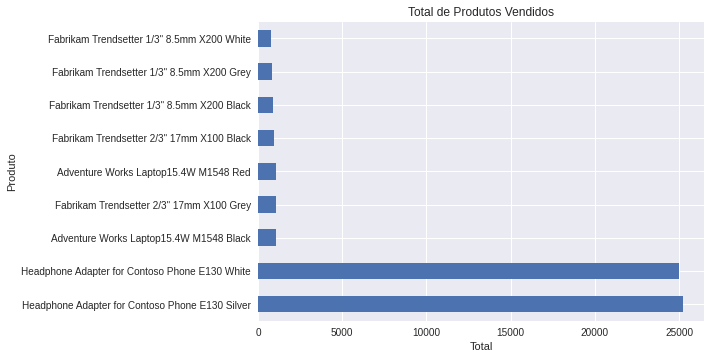

In [ ]:
#Exibindo o gráfico de produtos vendidos
df_salesprod.plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

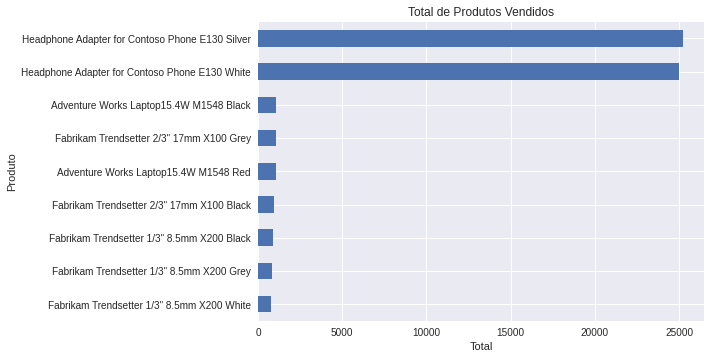

In [ ]:
#Exibindo o gráfico de produtos vendidos do maior para o menor
df_salesprod.sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

In [ ]:
#Exibindo a evolução anual do lucro
df_annualprofits = df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()
df_annualprofits

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

Text(0, 0.5, 'Lucro')

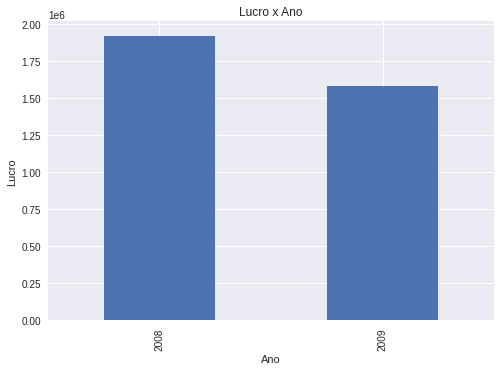

In [ ]:
#Exibindo o gráfico do lucro anual
df_annualprofits.plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro")

In [ ]:
#Criando um subset para o ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009

#Exibindo o lucro mensal do ano de 2009
df_monthlyprofits_2009 = df_2009.groupby(df_2009["Data Venda"].dt.month)
df_monthlyprofits_2009.sum()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Custo,Receita Total,Lucro,Tempo_processamento
Data Venda,,,,,,,,,,,,
1,12210,50107,819018,"11,805.33","31,470.92",2396,"41,704.37","236,783.51","106,064.47","257,338,064.13","130,719.04",290
2,14066,46991,915174,"14,253.79","36,518.94",2553,"39,052.76","323,443.64","144,214.72","287,261,094.84","179,228.92",386
3,11885,49178,838106,"13,065.58","35,878.95",2050,"44,678.78","264,427.94","116,889.69","263,322,670.27","147,538.25",462
4,5168,23600,380691,"5,684.63","15,670.97",1015,"13,567.30","113,126.82","46,772.43","119,692,122.85","66,354.39",121
5,5570,19434,399403,"6,443.06","16,494.98",888,0.00,"151,306.80","60,766.80","125,676,728.99","90,540.00",227
6,12803,61417,896023,"12,099.15","33,223.89",6330,"21,517.72","341,204.28","140,893.87","281,276,488.70","200,310.41",481
7,14129,58165,972380,"14,462.90","38,903.92",4425,"11,817.96","379,725.72","152,591.21","305,214,913.27","227,134.51",404
8,2189,17970,208779,"2,033.64","5,522.95",1525,"9,169.56","82,526.04","35,769.62","65,830,667.57","46,756.42",93
9,5981,29632,438681,"5,748.01","15,257.94",2453,"6,977.54","146,069.42","62,116.80","137,645,941.28","83,952.62",213


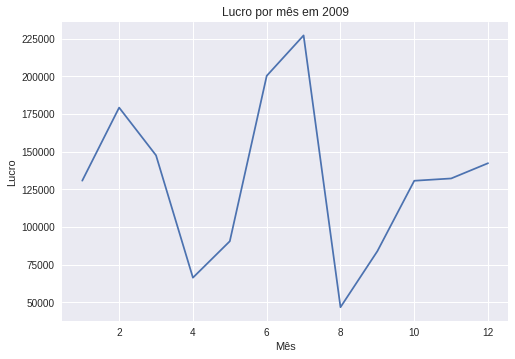

In [ ]:
#Plotando o gráfico 2009 mês x lucro (usando variável)
df_monthlyprofits_2009["Lucro"].sum().plot(title="Lucro por mês em 2009")
plt.xlabel("Mês")
plt.ylabel("Lucro");

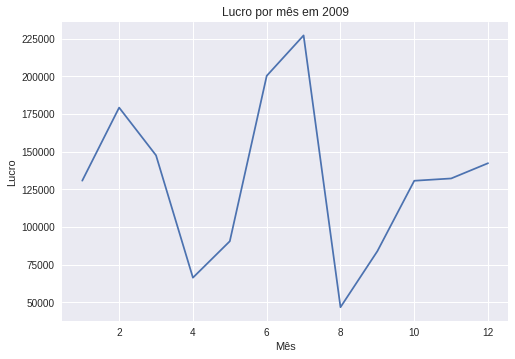

In [ ]:
#Plotando o gráfico 2009 mês x lucro
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro por mês em 2009")
plt.xlabel("Mês")
plt.ylabel("Lucro");

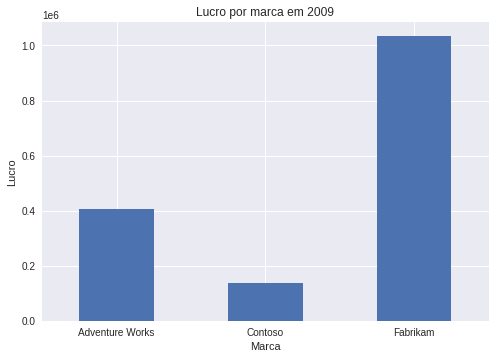

In [ ]:
#Plotando o gráfico 2009 marca x lucro
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro por marca em 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

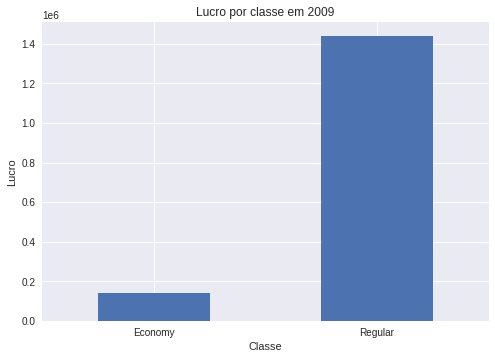

In [ ]:
#Plotando o gráfico 2009 classe x lucro
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro por classe em 2009")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [ ]:
df["Tempo_processamento"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_processamento, dtype: float64

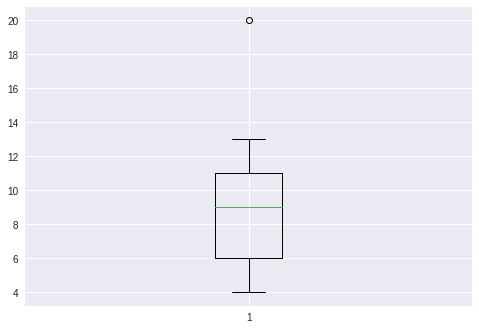

In [ ]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo_processamento"]);

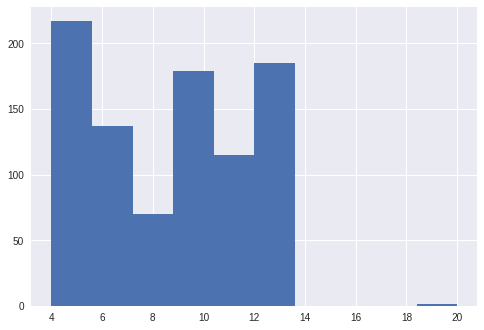

In [ ]:
#Histograma
plt.hist(df["Tempo_processamento"]);

In [ ]:
#Tempo mínimo de processamento
minimo = df["Tempo_processamento"].min()

#Tempo máximo de processamento
maximo = df["Tempo_processamento"].max()

#Identificando o Outlier
outlier = df[df["Tempo_processamento"] == 20]

print("Valor mínimo: ", minimo)
print("Valor máximo: ", maximo)
print("\nValor excêntrico:")
print(outlier)

Valor mínimo:  4
Valor máximo:  20

Valor excêntrico:
  Data Venda Data Envio  ...                Lucro  Tempo_processamento
0 2008-05-09 2008-05-29  ...             2,456.52                   20

[1 rows x 20 columns]


In [ ]:
outlier

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Receita Total,Lucro,Tempo_processamento
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","5,984,606.14","2,456.52",20


In [ ]:
#Exportando o arquivo para csv
df.to_csv("df_vendas_novo.csv", index=False)